In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests

# API de saúde mental
mental_health_url = "https://ghoapi.azureedge.net/api/MH_12"
mental_health_response = requests.get(mental_health_url)
mental_health_data = mental_health_response.json()['value']
df_mental_health = pd.DataFrame(mental_health_data)

# API de índices econômicos
econ_url = "https://api.worldbank.org/v2/country/all/indicator/NY.GDP.MKTP.CD;NY.GDP.PCAP.CD;SL.UEM.TOTL.ZS;FP.CPI.TOTL.ZG;SP.POP.TOTL?date=2013:2023&format=json&per_page=20000&source=2"
econ_response = requests.get(econ_url)
econ_data = econ_response.json()[1]
df_econ = pd.DataFrame(econ_data)

In [3]:
df_econ.head()

,indicator,country,countryiso3code,date,value,unit,obs_status,decimal,scale
0,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2023,1.245472e+12,,,0,NaN
1,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2022,1.191423e+12,,,0,NaN
2,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2021,1.085745e+12,,,0,NaN
3,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2020,9.333918e+11,,,0,NaN
4,"{'id': 'NY.GDP.MKTP.CD', 'value': 'GDP (curren...","{'id': 'ZH', 'value': 'Africa Eastern and Sout...",AFE,2019,1.009721e+12,,,0,NaN


In [4]:
# Normalizando os campos aninhados
df_econ_flat = pd.json_normalize(df_econ.to_dict(orient='records'))

# Selecionando apenas os campos desejados
df_econ_final = df_econ_flat[['country.value', 'indicator.id', 'indicator.value', 'date', 'value']]

# Renomeando para facilitar
df_econ_final = df_econ_final.rename(columns={
    'country.value': 'pais',
    'indicator.id': 'indicador_id',
    'indicator.value': 'indicador_nome',
    'date': 'ano',
    'value': 'valor'
})

df_econ_final.head()

,pais,indicador_id,indicador_nome,ano,valor
0,Africa Eastern and Southern,NY.GDP.MKTP.CD,GDP (current US$),2023,1.245472e+12
1,Africa Eastern and Southern,NY.GDP.MKTP.CD,GDP (current US$),2022,1.191423e+12
2,Africa Eastern and Southern,NY.GDP.MKTP.CD,GDP (current US$),2021,1.085745e+12
3,Africa Eastern and Southern,NY.GDP.MKTP.CD,GDP (current US$),2020,9.333918e+11
4,Africa Eastern and Southern,NY.GDP.MKTP.CD,GDP (current US$),2019,1.009721e+12


In [5]:
df_econ_final['pais'].unique()

array(['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle in

In [6]:
# Atualiza variável df_econ com o DataFrame final
df_econ = df_econ_final

In [7]:
df_econ['indicador_nome'].unique()


array(['GDP (current US$)', 'GDP per capita (current US$)',
       'Unemployment, total (% of total labor force) (modeled ILO estimate)',
       'Inflation, consumer prices (annual %)', 'Population, total'],
      dtype=object)

In [8]:
indicadores_pt = {
    'GDP (current US$)': 'PIB US$',
    'GDP per capita (current US$)': 'PIB per capita US$',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)': 'Desemprego (%)',
    'Inflation, consumer prices (annual %)': 'Inflação (%)',
    'Population, total': 'População'
}

df_econ['indicador_nome'] = df_econ['indicador_nome'].replace(indicadores_pt)
df_econ['indicador_nome'].unique()

array(['PIB US$', 'PIB per capita US$', 'Desemprego (%)', 'Inflação (%)',
       'População'], dtype=object)

In [9]:
df_mental_health.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,Dim1,TimeDim,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,8354896,MH_12,COUNTRY,CUB,AMR,YEAR,Americas,SEX,SEX_BTSX,2012,...,None,10.7 [9.6-11.9],10.69426,9.58093,11.89096,None,2025-01-28T14:13:24.673+01:00,2012,2012-01-01T00:00:00+01:00,2012-12-31T00:00:00+01:00
1,8354910,MH_12,COUNTRY,LAO,WPR,YEAR,Western Pacific,SEX,SEX_MLE,2005,...,None,9.5 [6.1-15.6],9.46211,6.13705,15.63229,None,2025-01-28T14:13:24.673+01:00,2005,2005-01-01T00:00:00+01:00,2005-12-31T00:00:00+01:00
2,8354998,MH_12,COUNTRY,SRB,EUR,YEAR,Europe,SEX,SEX_FMLE,2006,...,None,7.7 [6.1-9.6],7.71574,6.10209,9.62205,None,2025-01-28T14:13:24.673+01:00,2006,2006-01-01T00:00:00+01:00,2006-12-31T00:00:00+01:00
3,1437,MH_12,COUNTRY,SSD,AFR,YEAR,Africa,SEX,SEX_FMLE,2020,...,None,5.9 [3.4-9.4],5.91657,3.38785,9.35665,None,2025-01-28T14:13:24.673+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00
4,2605,MH_12,COUNTRY,ZWE,AFR,YEAR,Africa,SEX,SEX_BTSX,2021,...,None,25.4 [13.6-40.8],25.42333,13.60941,40.84616,None,2025-01-28T14:13:24.673+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00


In [10]:
### Coluna - Descrição
# Id                        - Identificador único do registro
# IndicatorCode	            - Código do indicador (MH_12 = suicídio)
# SpatialDimType            - Tipo de dimensão espacial (ex: COUNTRY)
# SpatialDim                - Código do país (ex: BRA, USA, etc.)
# TimeDimType               - Tipo de dimensão temporal (ex: YEAR)
# ParentLocationCode        - Código da região (ex: AMR = Americas)
# ParentLocation            - Nome da região (ex: Americas, Europe, Africa)
# Dim1Type                  - Tipo da dimensão 1 (ex: SEX)
# TimeDim                   - Ano da observação
# Dim1                      - Valor da dimensão 1 (ex: SEX_MLE = masculino, SEX_FMLE = feminino)
# Value	                    - Valor da taxa de suicídios por 100 mil habitantes no país (ex: "1.7 [1.0-2.5]")
# NumericValue              - Valor numérico central (ex: 1.68139)
# Low                       - Limite inferior do intervalo de confiança
# High                      - Limite superior do intervalo de confiança
# Comments                  - Comentários (geralmente None)
# Date                      - Data de atualização
# TimeDimensionValue        - Ano (igual ao TimeDim)
# TimeDimensionBegin        - Data de início do período
# TimeDimensionEnd          - Data de fim do período

In [11]:
df_mental_health['SpatialDimType'].unique()

array(['COUNTRY', 'WORLDBANKINCOMEGROUP', 'REGION', 'GLOBAL'],
      dtype=object)

In [12]:
df_saude_mental = df_mental_health.rename(columns={
    'SpatialDimType': 'tipo_dimensao_espacial',
    'SpatialDim': 'dimensao_espacial',
    'TimeDimType': 'tipo_dimensao_temporal',
    'TimeDim': 'dimensao_temporal',
    'ParentLocation': 'regiao',
    'Dim1': 'sexo',
    'NumericValue': 'taxa_sui_100k_hab',
    'Low': 'Lim_inf',
    'High': 'Lim_sup'
})[
    ['tipo_dimensao_espacial', 'dimensao_espacial', 'tipo_dimensao_temporal', 
     'dimensao_temporal', 'regiao', 'sexo', 'taxa_sui_100k_hab', 'Lim_inf', 'Lim_sup']
]

df_saude_mental.head()

,tipo_dimensao_espacial,dimensao_espacial,tipo_dimensao_temporal,dimensao_temporal,regiao,sexo,taxa_sui_100k_hab,Lim_inf,Lim_sup
0,COUNTRY,CUB,YEAR,2012,Americas,SEX_BTSX,10.69426,9.58093,11.89096
1,COUNTRY,LAO,YEAR,2005,Western Pacific,SEX_MLE,9.46211,6.13705,15.63229
2,COUNTRY,SRB,YEAR,2006,Europe,SEX_FMLE,7.71574,6.10209,9.62205
3,COUNTRY,SSD,YEAR,2020,Africa,SEX_FMLE,5.91657,3.38785,9.35665
4,COUNTRY,ZWE,YEAR,2021,Africa,SEX_BTSX,25.42333,13.60941,40.84616


In [13]:
df_saude_mental['sexo'].unique()

array(['SEX_BTSX', 'SEX_MLE', 'SEX_FMLE'], dtype=object)

In [14]:
# Facilita a leitura dos dados de sexo
df_saude_mental['sexo'] = df_saude_mental['sexo'].replace({
    'SEX_FMLE': 'F',
    'SEX_MLE': 'M',
    'SEX_BTSX': 'Ambos'
})

df_saude_mental['sexo'].unique()

array(['Ambos', 'M', 'F'], dtype=object)

In [15]:
%pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pycountry

def codigo_para_nome(codigo):
    try:
        return pycountry.countries.get(alpha_3=codigo).name
    except:
        return None

df_saude_mental['nome_pais'] = df_saude_mental['dimensao_espacial'].apply(codigo_para_nome)
df_saude_mental[['dimensao_espacial', 'nome_pais']].head()

,dimensao_espacial,nome_pais
0,CUB,Cuba
1,LAO,Lao People's Democratic Republic
2,SRB,Serbia
3,SSD,South Sudan
4,ZWE,Zimbabwe


In [17]:
# df_saude_mental[(df_saude_mental['nome_pais'].isnull()) & (df_saude_mental['tipo_dimensao_espacial'] == 'COUNTRY')]
# retorna vazio pois todos os códigos de países estão corretos

In [18]:
df_saude_mental[df_saude_mental['dimensao_espacial'] == 'GLOBAL']

,tipo_dimensao_espacial,dimensao_espacial,tipo_dimensao_temporal,dimensao_temporal,regiao,sexo,taxa_sui_100k_hab,Lim_inf,Lim_sup,nome_pais
298,GLOBAL,GLOBAL,YEAR,2004,None,M,17.40762,14.38097,20.14391,None
439,GLOBAL,GLOBAL,YEAR,2009,None,Ambos,11.15438,8.97744,13.07723,None
475,GLOBAL,GLOBAL,YEAR,2013,None,Ambos,10.21287,8.17427,12.10611,None
586,GLOBAL,GLOBAL,YEAR,2016,None,F,6.01072,4.42521,7.50321,None
694,GLOBAL,GLOBAL,YEAR,2019,None,M,13.09098,10.45372,15.97413,None
...,...,...,...,...,...,...,...,...,...,...
12003,GLOBAL,GLOBAL,YEAR,2017,None,Ambos,9.55449,7.52821,11.62213,None
12335,GLOBAL,GLOBAL,YEAR,2012,None,M,14.42000,12.00853,16.84550,None
12357,GLOBAL,GLOBAL,YEAR,2014,None,F,6.26830,4.65076,7.71961,None
12707,GLOBAL,GLOBAL,YEAR,2011,None,Ambos,10.69536,8.57758,12.62006,None


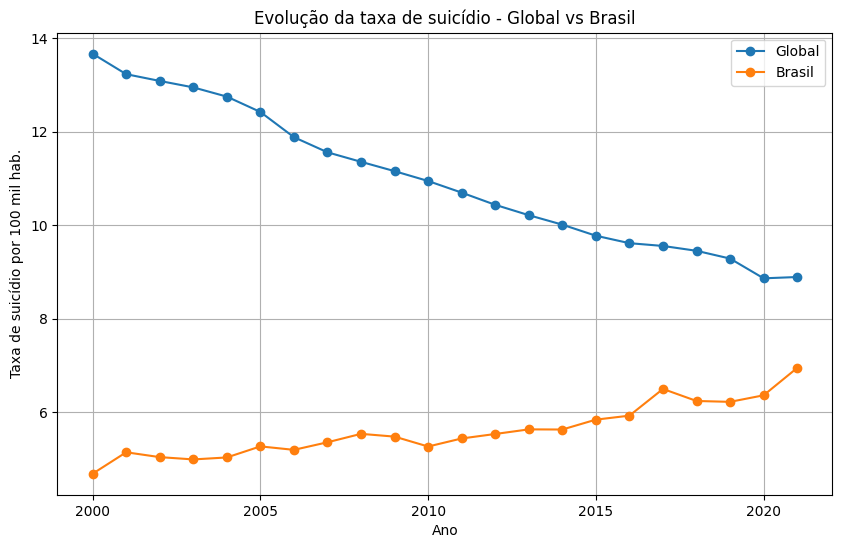

In [19]:
df_global = df_saude_mental[(df_saude_mental['dimensao_espacial'] == 'GLOBAL') & (df_saude_mental['sexo'] == 'Ambos')]
df_brasil = df_saude_mental[(df_saude_mental['dimensao_espacial'] == 'BRA') & (df_saude_mental['sexo'] == 'Ambos')]

df_global = df_global.sort_values('dimensao_temporal')
df_brasil = df_brasil.sort_values('dimensao_temporal')

plt.figure(figsize=(10,6))
plt.plot(df_global['dimensao_temporal'], df_global['taxa_sui_100k_hab'], marker='o', label='Global')
plt.plot(df_brasil['dimensao_temporal'], df_brasil['taxa_sui_100k_hab'], marker='o', label='Brasil')
plt.xlabel('Ano')
plt.ylabel('Taxa de suicídio por 100 mil hab.')
plt.title('Evolução da taxa de suicídio - Global vs Brasil')
plt.legend()
plt.grid(True)
plt.show()

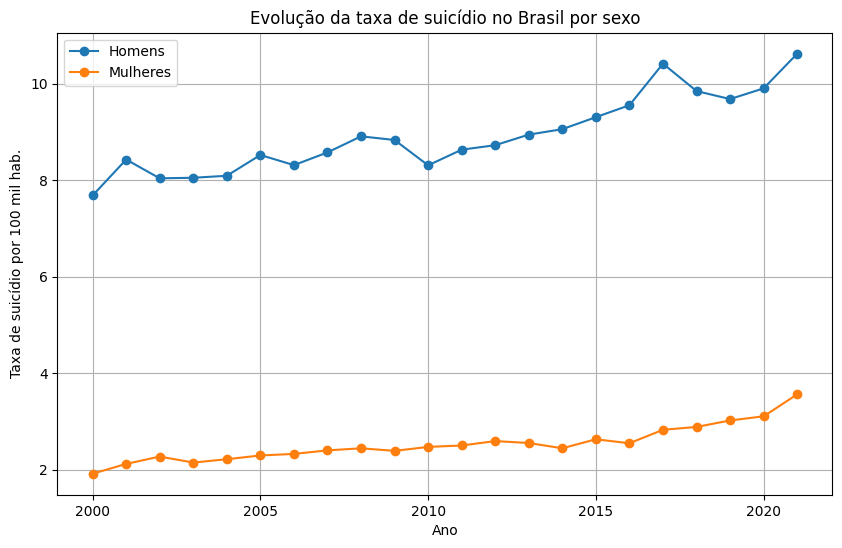

In [20]:
df_brasil_m = df_saude_mental[(df_saude_mental['dimensao_espacial'] == 'BRA') & (df_saude_mental['sexo'] == 'M')]
df_brasil_f = df_saude_mental[(df_saude_mental['dimensao_espacial'] == 'BRA') & (df_saude_mental['sexo'] == 'F')]

df_brasil_m = df_brasil_m.sort_values('dimensao_temporal')
df_brasil_f = df_brasil_f.sort_values('dimensao_temporal')

plt.figure(figsize=(10,6))
plt.plot(df_brasil_m['dimensao_temporal'], df_brasil_m['taxa_sui_100k_hab'], marker='o', label='Homens')
plt.plot(df_brasil_f['dimensao_temporal'], df_brasil_f['taxa_sui_100k_hab'], marker='o', label='Mulheres')
plt.xlabel('Ano')
plt.ylabel('Taxa de suicídio por 100 mil hab.')
plt.title('Evolução da taxa de suicídio no Brasil por sexo')
plt.legend()
plt.grid(True)
plt.show()

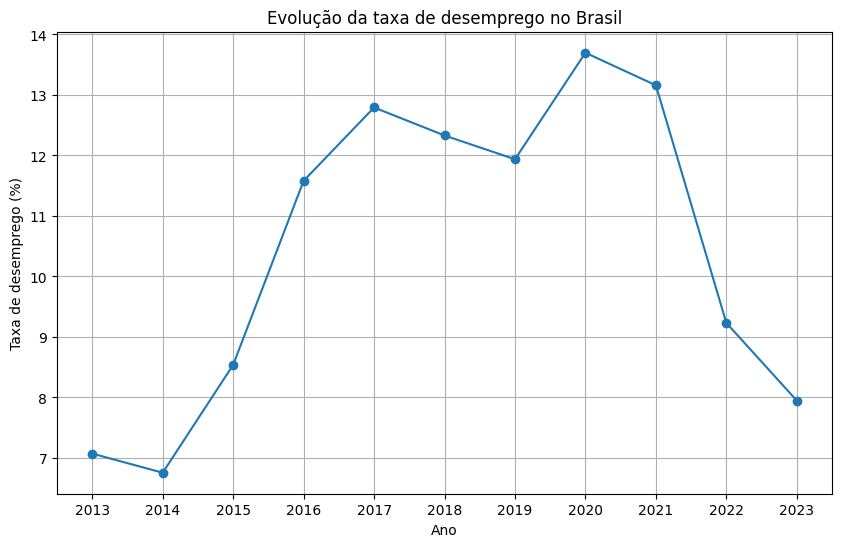

In [21]:
# Filtra desemprego no Brasil
df_desemprego_brasil = df_econ[
    (df_econ['indicador_nome'].str.contains('Desemprego', case=False)) &
    (df_econ['pais'] == 'Brazil')
].sort_values('ano')

plt.figure(figsize=(10,6))
plt.plot(df_desemprego_brasil['ano'], df_desemprego_brasil['valor'], marker='o')
plt.xlabel('Ano')
plt.ylabel('Taxa de desemprego (%)')
plt.title('Evolução da taxa de desemprego no Brasil')
plt.grid(True)
plt.show()

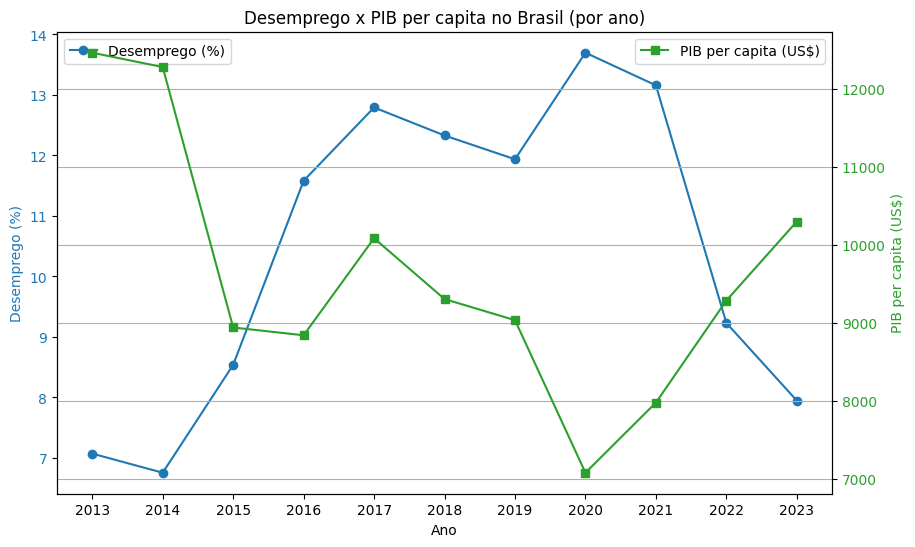

In [22]:
# Filtra desemprego e PIB per capita para o Brasil
df_desemprego = df_econ[
    (df_econ['indicador_nome'] == 'Desemprego (%)') &
    (df_econ['pais'] == 'Brazil')
][['ano', 'valor']].rename(columns={'valor': 'desemprego'}).sort_values('ano')

df_pib_per_capita = df_econ[
    (df_econ['indicador_nome'] == 'PIB per capita US$') &
    (df_econ['pais'] == 'Brazil')
][['ano', 'valor']].rename(columns={'valor': 'pib_per_capita'}).sort_values('ano')

# Junta os dois dataframes pelo ano
df_plot = pd.merge(df_desemprego, df_pib_per_capita, on='ano')

fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:blue'
ax1.set_xlabel('Ano')
ax1.set_ylabel('Desemprego (%)', color=color)
ax1.plot(df_plot['ano'], df_plot['desemprego'], marker='o', color=color, label='Desemprego (%)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('PIB per capita (US$)', color=color)
ax2.plot(df_plot['ano'], df_plot['pib_per_capita'], marker='s', color=color, label='PIB per capita (US$)')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Desemprego x PIB per capita no Brasil (por ano)')
plt.grid(True)
plt.show()

In [23]:
df_desemprego['ano'] = df_desemprego['ano'].astype(str)
df_pib_per_capita['ano'] = df_pib_per_capita['ano'].astype(str)

# Junta novamente
df_merged = pd.merge(df_desemprego, df_pib_per_capita, on='ano', suffixes=('_desemprego', '_pib'))

print(df_merged.shape)
print(df_merged.columns, '\n')
print(df_merged[['ano', 'pib_per_capita', 'desemprego']])

(11, 3)
Index(['ano', 'desemprego', 'pib_per_capita'], dtype='object') 

     ano  pib_per_capita  desemprego
0   2013    12458.891215       7.071
1   2014    12274.993969       6.755
2   2015     8936.196618       8.538
3   2016     8836.286526      11.580
4   2017    10080.509282      12.792
5   2018     9300.661649      12.329
6   2019     9029.833267      11.936
7   2020     7074.193783      13.697
8   2021     7972.536650      13.158
9   2022     9281.333344       9.231
10  2023    10294.866681       7.947


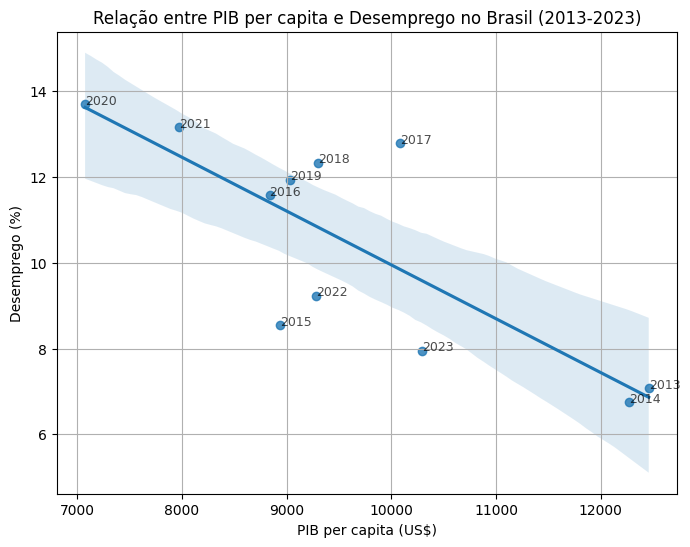

In [24]:
plt.figure(figsize=(8,6))
sns.regplot(x='pib_per_capita', y='desemprego', data=df_merged)
for i, row in df_merged.iterrows():
    plt.annotate(row['ano'], (row['pib_per_capita'], row['desemprego']), fontsize=9, alpha=0.7)
plt.xlabel('PIB per capita (US$)')
plt.ylabel('Desemprego (%)')
plt.title('Relação entre PIB per capita e Desemprego no Brasil (2013-2023)')
plt.grid(True)
plt.show()

In [25]:
print(df_global.shape)
print(df_global[['dimensao_temporal', 'taxa_sui_100k_hab']])
print(df_saude_mental['dimensao_espacial'].unique())

(22, 10)
       dimensao_temporal  taxa_sui_100k_hab
5422                2000           13.66625
2525                2001           13.22870
11674               2002           13.08414
5337                2003           12.94619
10592               2004           12.74896
1593                2005           12.42018
11597               2006           11.88120
8535                2007           11.55754
710                 2008           11.35409
439                 2009           11.15438
996                 2010           10.94365
12707               2011           10.69536
10165               2012           10.43439
475                 2013           10.21287
1461                2014           10.01004
11785               2015            9.77330
4083                2016            9.61392
12003               2017            9.55449
9598                2018            9.45098
3025                2019            9.28456
2064                2020            8.86228
6894                202

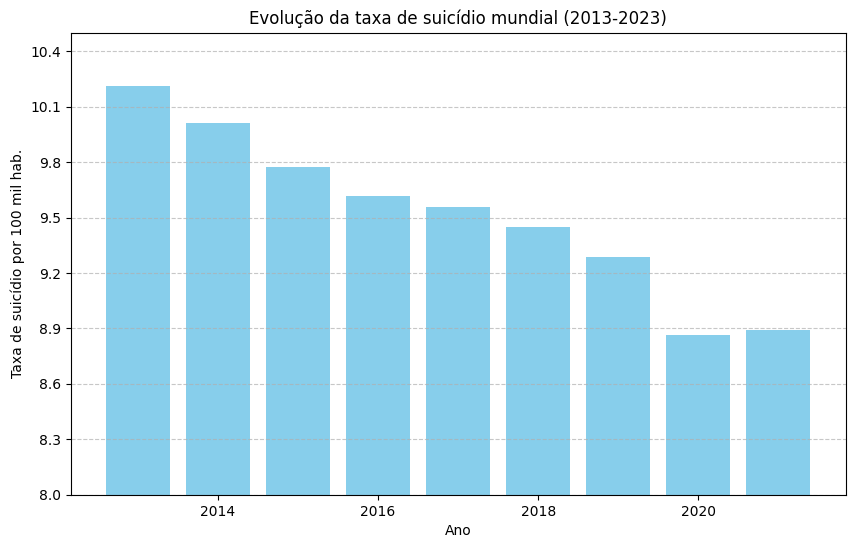

In [26]:
# Evolução da taxa de suicídio mundial (2013-2023)
# Análise: Linha mostrando a evolução global da taxa de suicídio
df_global = df_saude_mental[(df_saude_mental['dimensao_espacial'] == 'GLOBAL') & (df_saude_mental['sexo'] == 'Ambos')]
df_global = df_global.sort_values('dimensao_temporal')
# Certifique-se de que 'dimensao_temporal' está no formato correto
df_global['dimensao_temporal'] = df_global['dimensao_temporal'].astype(int)

# Filtra os dados apenas para os anos de 2013 a 2023
df_global_filtered = df_global[(df_global['dimensao_temporal'] >= 2013) & (df_global['dimensao_temporal'] <= 2023)]

# Gráfico de barras: Evolução da taxa de suicídio mundial (2013-2023)
plt.figure(figsize=(10, 6))
plt.bar(df_global_filtered['dimensao_temporal'], df_global_filtered['taxa_sui_100k_hab'], color='skyblue')
plt.xlabel('Ano')
plt.ylabel('Taxa de suicídio por 100 mil hab.')
plt.title('Evolução da taxa de suicídio mundial (2013-2023)')

# Ajusta o eixo y
plt.ylim(8, 10.5)  # Ajusta os limites do eixo y para 8 a 14
plt.yticks(np.arange(8, 10.5, 0.3))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

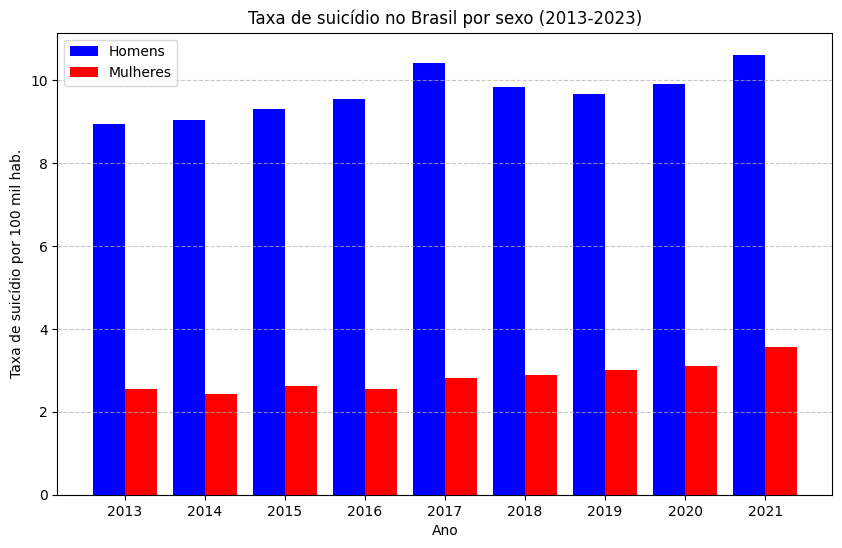

In [27]:
# Filtra os dados para os anos de 2013 a 2023
df_brasil_m = df_saude_mental[(df_saude_mental['dimensao_espacial'] == 'BRA') & 
                              (df_saude_mental['sexo'] == 'M') & 
                              (df_saude_mental['dimensao_temporal'] >= 2013) & 
                              (df_saude_mental['dimensao_temporal'] <= 2023)]

df_brasil_f = df_saude_mental[(df_saude_mental['dimensao_espacial'] == 'BRA') & 
                              (df_saude_mental['sexo'] == 'F') & 
                              (df_saude_mental['dimensao_temporal'] >= 2013) & 
                              (df_saude_mental['dimensao_temporal'] <= 2023)]

# Ordena os dados por ano
df_brasil_m = df_brasil_m.sort_values('dimensao_temporal')
df_brasil_f = df_brasil_f.sort_values('dimensao_temporal')

# Configura o gráfico de barras lado a lado
x = df_brasil_m['dimensao_temporal']
width = 0.4  # Largura das barras

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, df_brasil_m['taxa_sui_100k_hab'], width=width, label='Homens', color='blue')
plt.bar(x + width/2, df_brasil_f['taxa_sui_100k_hab'], width=width, label='Mulheres', color='red')

# Configurações do gráfico
plt.xlabel('Ano')
plt.ylabel('Taxa de suicídio por 100 mil hab.')
plt.title('Taxa de suicídio no Brasil por sexo (2013-2023)')
plt.xticks(x)  # Define os anos no eixo x
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [28]:
df_desemprego['ano'] = df_desemprego['ano'].astype(str)
df_pib_per_capita['ano'] = df_pib_per_capita['ano'].astype(str)

# Junta novamente
df_merged = pd.merge(df_desemprego, df_pib_per_capita, on='ano', suffixes=('_desemprego', '_pib'))

print(df_merged.shape)
print(df_merged.columns, '\n')
print(df_merged[['ano', 'pib_per_capita', 'desemprego']])

(11, 3)
Index(['ano', 'desemprego', 'pib_per_capita'], dtype='object') 

     ano  pib_per_capita  desemprego
0   2013    12458.891215       7.071
1   2014    12274.993969       6.755
2   2015     8936.196618       8.538
3   2016     8836.286526      11.580
4   2017    10080.509282      12.792
5   2018     9300.661649      12.329
6   2019     9029.833267      11.936
7   2020     7074.193783      13.697
8   2021     7972.536650      13.158
9   2022     9281.333344       9.231
10  2023    10294.866681       7.947


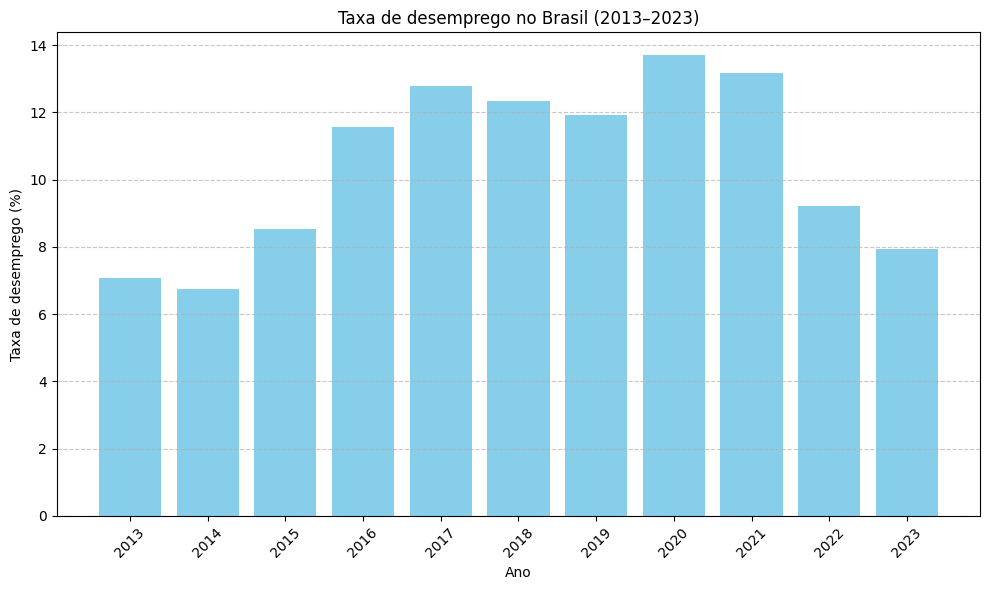

In [29]:
# 2a. Taxa de Desemprego no Brasil (2013–2023)
# Análise: Linha mostrando a evolução do desemprego
df_desemprego_brasil = df_econ[
    (df_econ['indicador_nome'] == 'Desemprego (%)') &
    (df_econ['pais'] == 'Brazil')
].sort_values('ano')
# Gráfico de barras verticais
plt.figure(figsize=(10,6))
plt.bar(df_desemprego_brasil['ano'], df_desemprego_brasil['valor'], color='skyblue')
plt.xlabel('Ano')
plt.ylabel('Taxa de desemprego (%)')
plt.title('Taxa de desemprego no Brasil (2013–2023)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

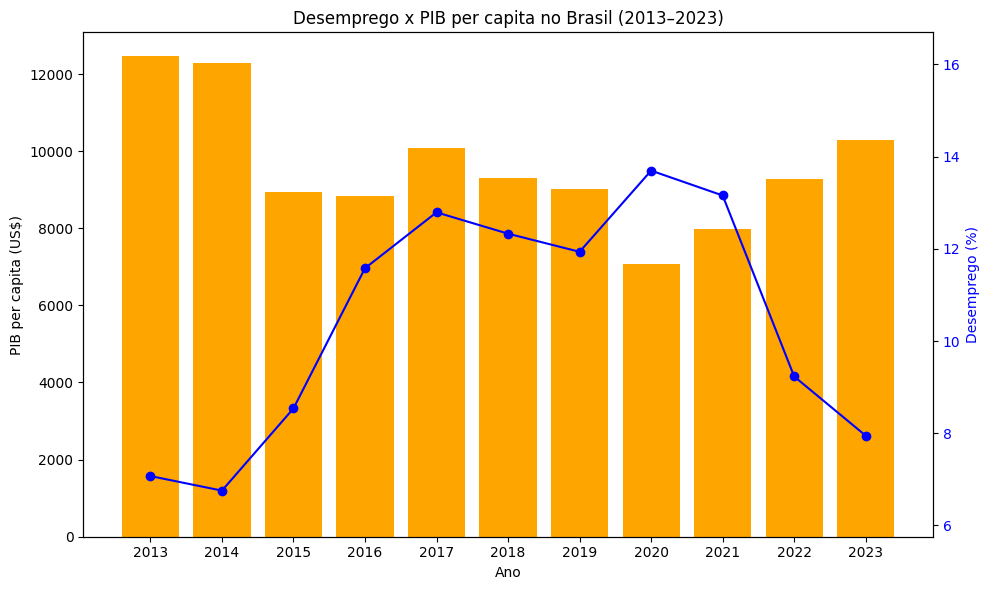

In [30]:
# 2b. Desemprego vs. PIB per Capita no Brasil (2013–2023)
# Análise: Barras para PIB per capita + Linha acima para desemprego

df_desemprego = df_econ[
    (df_econ['indicador_nome'] == 'Desemprego (%)') &
    (df_econ['pais'] == 'Brazil')
][['ano', 'valor']].rename(columns={'valor': 'desemprego'}).sort_values('ano')

df_pib_per_capita = df_econ[
    (df_econ['indicador_nome'].str.contains('PIB per capita')) &
    (df_econ['pais'] == 'Brazil')
][['ano', 'valor']].rename(columns={'valor': 'pib_per_capita'}).sort_values('ano')

df_plot = pd.merge(df_desemprego, df_pib_per_capita, on='ano')

fig, ax1 = plt.subplots(figsize=(10,6))

# Barras para PIB per capita
ax1.bar(df_plot['ano'], df_plot['pib_per_capita'], color='orange', label='PIB per capita (US$)')
ax1.set_xlabel('Ano')
ax1.set_ylabel('PIB per capita (US$)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Linha para desemprego (acima das barras)
ax2 = ax1.twinx()
ax2.plot(df_plot['ano'], df_plot['desemprego'], marker='o', color='blue', label='Desemprego (%)')
ax2.set_ylabel('Desemprego (%)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# 🔧 Ajustar escala do eixo para "elevar" a linha e dar mais espaço visual
ax2.set_ylim([df_plot['desemprego'].min() - 1, df_plot['desemprego'].max() + 3])


plt.title('Desemprego x PIB per capita no Brasil (2013–2023)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
fig.tight_layout()
plt.show()


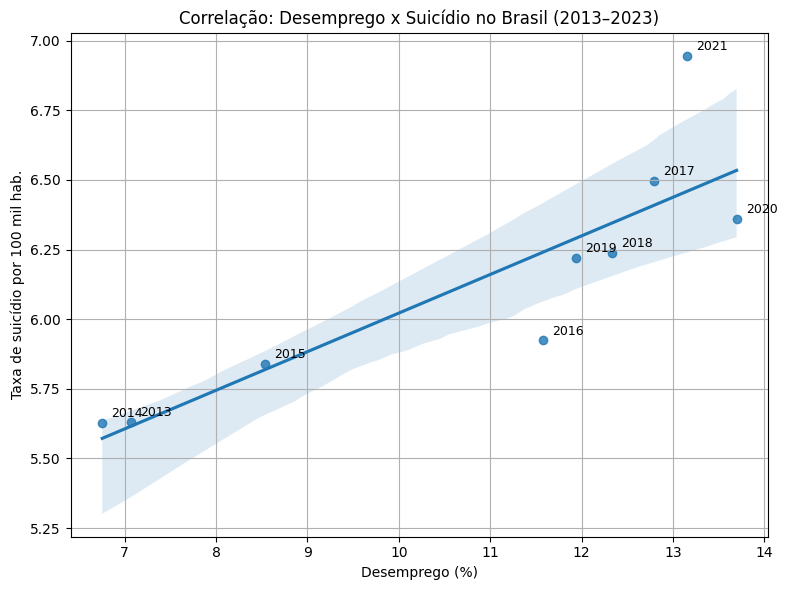

In [31]:
# 3a. Desemprego × Suicídio (Dispersão, 2013–2023)
# Análise: Dispersão com linha de regressão
df_sui = df_brasil[['dimensao_temporal', 'taxa_sui_100k_hab']].rename(columns={'dimensao_temporal': 'ano'})
df_sui['ano'] = df_sui['ano'].astype(str)
df_plot_corr = pd.merge(df_sui, df_desemprego, left_on='ano', right_on='ano')

plt.figure(figsize=(8,6))
sns.regplot(x='desemprego', y='taxa_sui_100k_hab', data=df_plot_corr)

# Adiciona o ano em cada ponto
for _, row in df_plot_corr.iterrows():
    plt.text(row['desemprego'] + 0.1, row['taxa_sui_100k_hab'] + 0.02, row['ano'], fontsize=9)

plt.xlabel('Desemprego (%)')
plt.ylabel('Taxa de suicídio por 100 mil hab.')
plt.title('Correlação: Desemprego x Suicídio no Brasil (2013–2023)')
plt.grid(True)
plt.tight_layout()
plt.show()


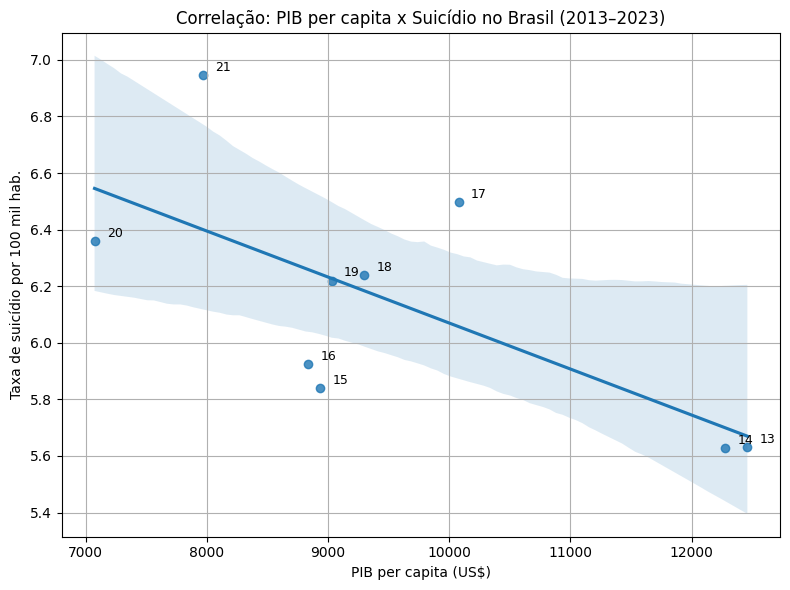

In [32]:
# 3b. PIB per Capita × Suicídio (Dispersão, 2013–2023) com anos nos pontos
df_plot_corr2 = pd.merge(df_sui, df_pib_per_capita, left_on='ano', right_on='ano')

plt.figure(figsize=(8,6))
sns.regplot(x='pib_per_capita', y='taxa_sui_100k_hab', data=df_plot_corr2)

# Adiciona o ano em cada ponto
for _, row in df_plot_corr2.iterrows():
    plt.text(row['pib_per_capita'] + 100, row['taxa_sui_100k_hab'] + 0.015, int(row['ano']) - 2000, fontsize=9)

plt.xlabel('PIB per capita (US$)')
plt.ylabel('Taxa de suicídio por 100 mil hab.')
plt.title('Correlação: PIB per capita x Suicídio no Brasil (2013–2023)')
plt.grid(True)
plt.tight_layout()
plt.show()


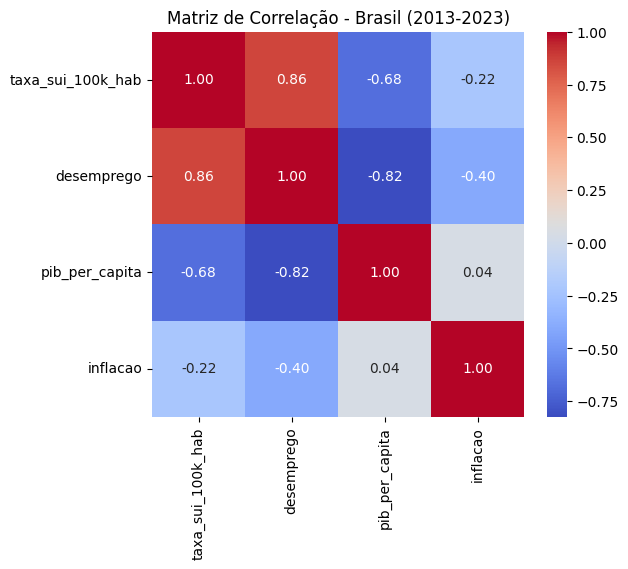

In [33]:
# 3d. Matriz de Correlação entre Suicídio, Desemprego, PIBpc e Inflação
# Análise: Heatmap de correlação
df_inflacao = df_econ[
    (df_econ['indicador_nome'] == 'Inflação (%)') &
    (df_econ['pais'] == 'Brazil')
][['ano', 'valor']].rename(columns={'valor': 'inflacao'}).sort_values('ano')
df_corr = df_plot_corr.merge(df_pib_per_capita, on='ano').merge(df_inflacao, on='ano')
df_corr = df_corr[['taxa_sui_100k_hab', 'desemprego', 'pib_per_capita', 'inflacao']]
corr_matrix = df_corr.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação - Brasil (2013-2023)')
plt.show()

C:\Users\igori\AppData\Local\Temp\ipykernel_22640\2458313254.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts = df_brasil.set_index('dimensao_temporal')['taxa_sui_100k_hab'].fillna(method='bfill')
C:\Users\igori\AppData\Local\Temp\ipykernel_22640\2458313254.py:19: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ts.index = pd.date_range(start=f"{ts.index.min()}-12-31", periods=len(ts), freq='Y')


Estatística ADF: 1.9795773500071918
Valor-p: 0.9986458192077484
⚠️ Não estacionária
Estatística ADF: -1.0809623418475793
Valor-p: 0.7226038889226183
⚠️ Não estacionária
Estatística ADF: -1.7168497798540951
Valor-p: 0.4224525402025437
⚠️ Não estacionária
Estatística ADF: -3.9939642079016178
Valor-p: 0.0014424482958574675
✅ Estacionária
Usando d = 3


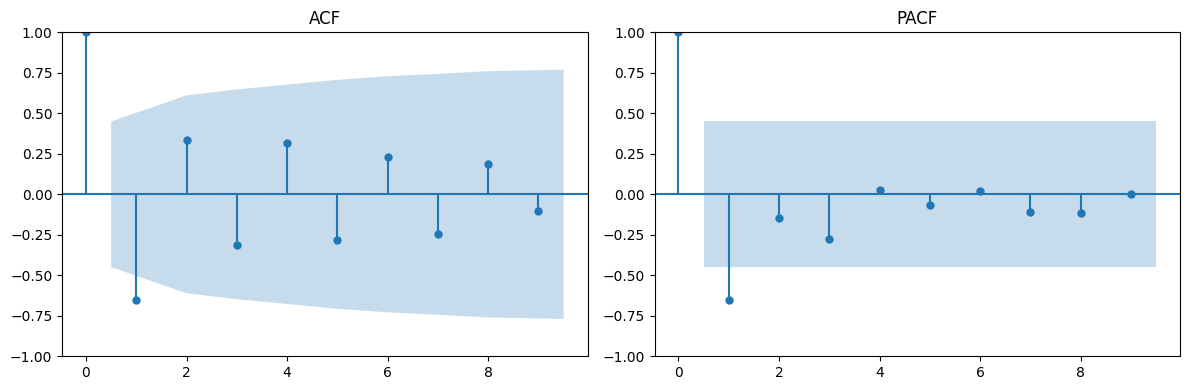

                               SARIMAX Results                                
Dep. Variable:      taxa_sui_100k_hab   No. Observations:                   22
Model:                 ARIMA(1, 3, 1)   Log Likelihood                  -5.508
Date:                Mon, 02 Jun 2025   AIC                             17.016
Time:                        22:42:00   BIC                             19.850
Sample:                    12-31-2000   HQIC                            17.496
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4579      0.374     -1.224      0.221      -1.191       0.275
ma.L1         -0.9924      4.112     -0.241      0.809      -9.053       7.068
sigma2         0.0856      0.336      0.255      0.7

C:\Users\igori\AppData\Local\Temp\ipykernel_22640\2458313254.py:59: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(start=f'{last_year+1}-12-31', periods=forecast_steps, freq='Y')


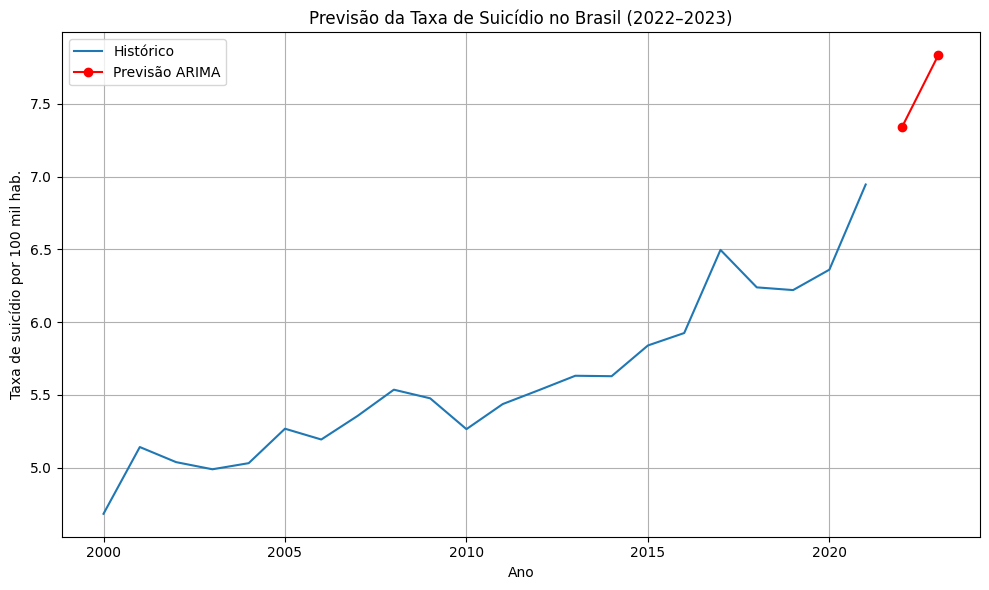


📊 Previsão para 2022: 7.34 suicídios por 100 mil hab.
📊 Previsão para 2023: 7.83 suicídios por 100 mil hab.


In [34]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Dados
df_brasil = df_saude_mental[
    (df_saude_mental['dimensao_espacial'] == 'BRA') &
    (df_saude_mental['sexo'] == 'Ambos')
].sort_values('dimensao_temporal')

df_brasil = df_brasil[df_brasil['dimensao_temporal'] <= 2021]
ts = df_brasil.set_index('dimensao_temporal')['taxa_sui_100k_hab'].fillna(method='bfill')

# Ajustar índice para datetime com frequência anual
ts.index = pd.date_range(start=f"{ts.index.min()}-12-31", periods=len(ts), freq='Y')

# 2. Teste de estacionariedade
def adf_test(series):
    result = adfuller(series)
    print(f'Estatística ADF: {result[0]}')
    print(f'Valor-p: {result[1]}')
    if result[1] <= 0.05:
        print("✅ Estacionária")
    else:
        print("⚠️ Não estacionária")
    return result[1]

ts_diff = ts.copy()
d = 0
while adf_test(ts_diff) > 0.05:
    ts_diff = ts_diff.diff().dropna()
    d += 1
print(f"Usando d = {d}")

# 3. ACF e PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(ts_diff, lags=9, ax=ax1)
plot_pacf(ts_diff, lags=9, ax=ax2)
ax1.set_title('ACF'); ax2.set_title('PACF')
plt.tight_layout()
plt.show()

# 4. Modelo ARIMA
order = (1, d, 1)
model = ARIMA(ts, order=order)
model_fit = model.fit()
print(model_fit.summary())

# 5. Previsão para os dois próximos anos
forecast_steps = 2
forecast = model_fit.forecast(steps=forecast_steps)

# Gerar índice de datas futuro
last_year = ts.index[-1].year
forecast_index = pd.date_range(start=f'{last_year+1}-12-31', periods=forecast_steps, freq='Y')
forecast_series = pd.Series(forecast, index=forecast_index)

# Printar valores
print("\n📈 Previsão:")
for ano, valor in zip(forecast_series.index.year, forecast_series.values):
    print(f"{ano}: {valor:.2f}")

# 6. Plotagem
plt.figure(figsize=(10, 6))
plt.plot(ts.index.year, ts.values, label='Histórico')
plt.plot(forecast_series.index.year, forecast_series.values, label='Previsão ARIMA', marker='o', color='red')
plt.title('Previsão da Taxa de Suicídio no Brasil (2022–2023)')
plt.xlabel('Ano')
plt.ylabel('Taxa de suicídio por 100 mil hab.')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



# Pegando diretamente os valores previstos para 2022 e 2023
previsao_sui_2022 = forecast_series.iloc[0]
previsao_sui_2023 = forecast_series.iloc[1]

print(f"\n📊 Previsão para 2022: {previsao_sui_2022:.2f} suicídios por 100 mil hab.")
print(f"📊 Previsão para 2023: {previsao_sui_2023:.2f} suicídios por 100 mil hab.")

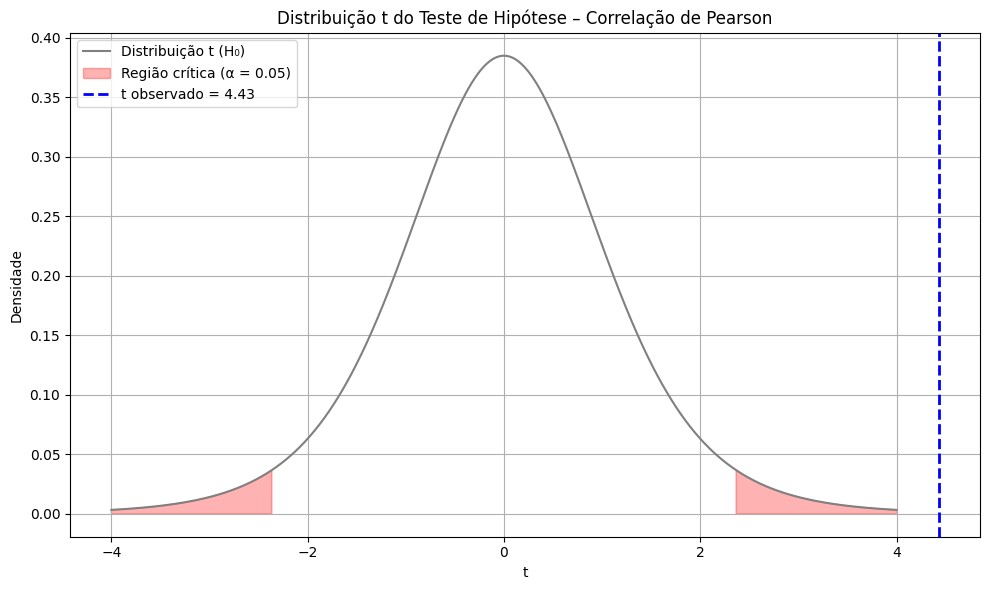

In [ ]:
from scipy.stats import pearsonr

# 1. Correlação entre desemprego e taxa de suicídio

# Preparar os dados
df_sui = df_brasil[['dimensao_temporal', 'taxa_sui_100k_hab']].rename(columns={'dimensao_temporal': 'ano'})
df_sui['ano'] = df_sui['ano'].astype(str)
df_plot_corr = pd.merge(df_sui, df_desemprego, left_on='ano', right_on='ano')

# Remover valores faltantes
df_plot_corr = df_plot_corr.dropna()

# Realizar o teste de correlação de Pearson
corr, p_value = pearsonr(df_plot_corr['desemprego'], df_plot_corr['taxa_sui_100k_hab'])

print("1. Correlação entre desemprego e taxa de suicídio:")
print(f"Correlação de Pearson: {corr:.2f}")
print(f"Valor-p: {p_value:.3f}")

# Interpretar os resultados
alpha = 0.05
if p_value < alpha:
    print("Rejeitamos a hipótese nula: Existe uma correlação significativa.")
else:
    print("Não rejeitamos a hipótese nula: Não há correlação significativa.")

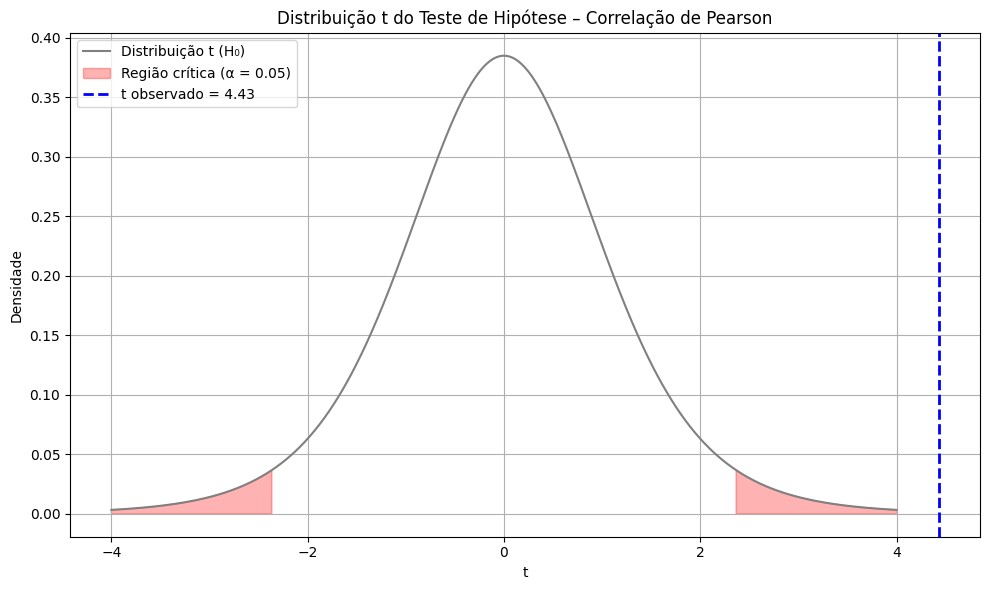

In [39]:
from scipy.stats import t

# Dados
n = len(df_plot_corr)
corr, p_value = pearsonr(df_plot_corr['desemprego'], df_plot_corr['taxa_sui_100k_hab'])

# Estatística t do teste de correlação de Pearson
t_obs = corr * np.sqrt((n - 2) / (1 - corr**2))
df = n - 2
alpha = 0.05

# Distribuição t
x = np.linspace(-4, 4, 500)
y = t.pdf(x, df)

# Limites críticos
t_crit = t.ppf(1 - alpha/2, df)

# Plotagem
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição t (H₀)', color='gray')
plt.fill_between(x, y, where=(x < -t_crit) | (x > t_crit), color='red', alpha=0.3, label='Região crítica (α = 0.05)')
plt.axvline(t_obs, color='blue', linestyle='--', linewidth=2, label=f't observado = {t_obs:.2f}')
plt.title('Distribuição t do Teste de Hipótese – Correlação de Pearson')
plt.xlabel('t')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


3. Diferença nas taxas de suicídio entre homens e mulheres:
Teste t: t = 34.26, p = 0.000
✅ Rejeitamos H₀: diferença significativa entre as médias.


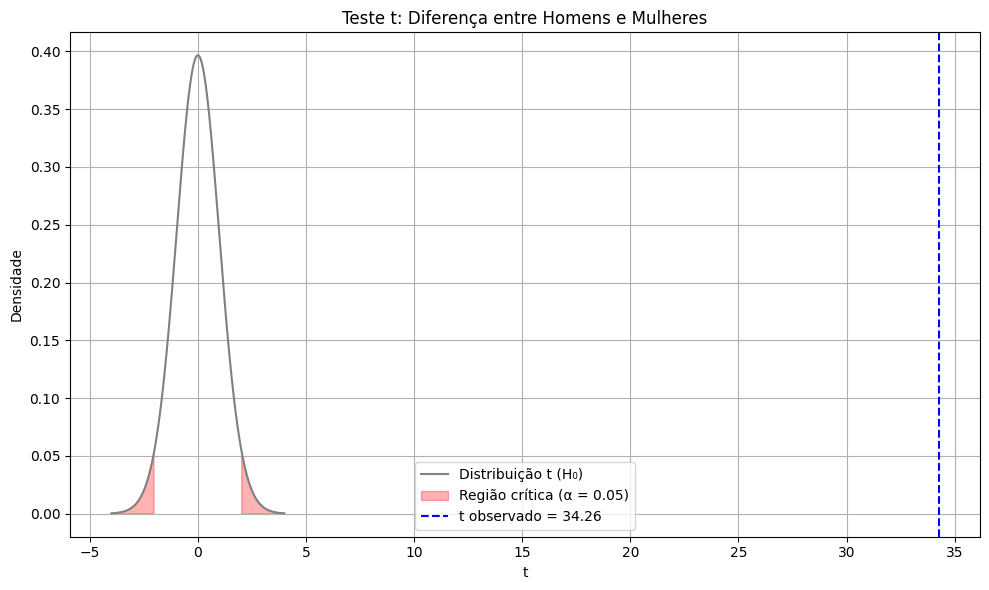

In [40]:
from scipy.stats import ttest_ind, levene

# 3. Diferença nas taxas de suicídio entre homens e mulheres

# Preparar os dados
df_brasil_m = df_saude_mental[(df_saude_mental['dimensao_espacial'] == 'BRA') & (df_saude_mental['sexo'] == 'M')]
df_brasil_f = df_saude_mental[(df_saude_mental['dimensao_espacial'] == 'BRA') & (df_saude_mental['sexo'] == 'F')]

# Remover valores faltantes
df_brasil_m = df_brasil_m.dropna(subset=['taxa_sui_100k_hab'])
df_brasil_f = df_brasil_f.dropna(subset=['taxa_sui_100k_hab'])

# Verificar se há dados suficientes para realizar o teste
if df_brasil_m.empty or df_brasil_f.empty:
    print("\n3. Diferença nas taxas de suicídio entre homens e mulheres:")
    print("Não há dados suficientes para realizar o teste t.")
else:
    taxas_m = df_brasil_m['taxa_sui_100k_hab']
    taxas_f = df_brasil_f['taxa_sui_100k_hab']

    # Teste de igualdade de variâncias
    stat_var, p_var = levene(taxas_m, taxas_f)
    equal_var = p_var > 0.05

    # Teste t
    t_stat, p_val = ttest_ind(taxas_m, taxas_f, equal_var=equal_var)

    print("\n3. Diferença nas taxas de suicídio entre homens e mulheres:")
    print(f"Teste t: t = {t_stat:.2f}, p = {p_val:.3f}")

    alpha = 0.05
    if p_val < alpha:
        print("✅ Rejeitamos H₀: diferença significativa entre as médias.")
    else:
        print("❌ Não rejeitamos H₀: sem diferença significativa.")

    # 🔽 Visualização da distribuição t com t observado
    df = len(taxas_m) + len(taxas_f) - 2
    x = np.linspace(-4, 4, 500)
    y = t.pdf(x, df)
    t_crit = t.ppf(1 - alpha/2, df)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Distribuição t (H₀)', color='gray')
    plt.fill_between(x, y, where=(x < -t_crit) | (x > t_crit), color='red', alpha=0.3, label='Região crítica (α = 0.05)')
    plt.axvline(t_stat, color='blue', linestyle='--', label=f't observado = {t_stat:.2f}')
    plt.title('Teste t: Diferença entre Homens e Mulheres')
    plt.xlabel('t')
    plt.ylabel('Densidade')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()